In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')

In [43]:
df = pd.read_csv("Resume.csv")

In [45]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [47]:
df.sample(5)

,Category,Resume
575,Python Developer,Technical Skills / Responsibilities: â¢ Hands...
820,ETL Developer,TechnicalProficiencies DB: Oracle 11g Domains:...
42,HR,Education Details \r\n BA mumbai University\...
374,Java Developer,Skills â¢ Language: Java â¢ Operating System...
275,Health and fitness,Education Details \r\nJanuary 2009 P.G. Sports...


In [49]:
df.shape

(962, 2)

In [51]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [53]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [55]:
# Data Visualization

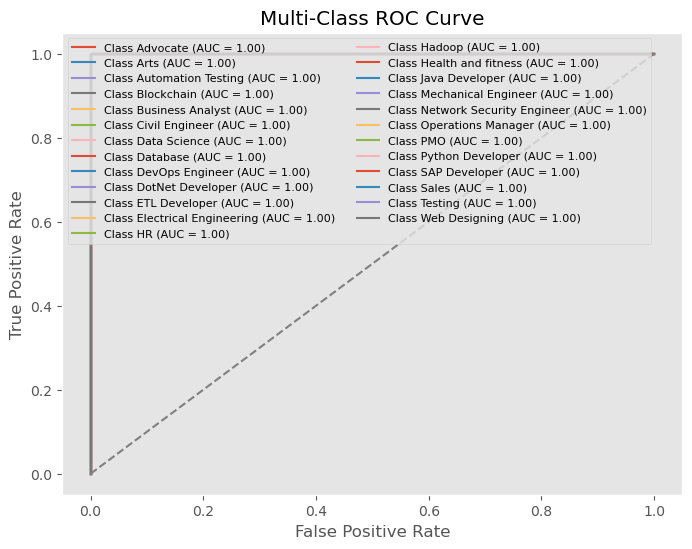

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

plt.figure(figsize=(8, 6), facecolor='white')

for i in range(len(le.classes_)):  
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    if len(fpr) > 0 and len(tpr) > 0:  # Ensure valid ROC values
        plt.plot(fpr, tpr, label=f'Class {le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')

plt.legend(loc='upper left', fontsize=8, ncol=2, frameon=True)
plt.grid()
plt.show()


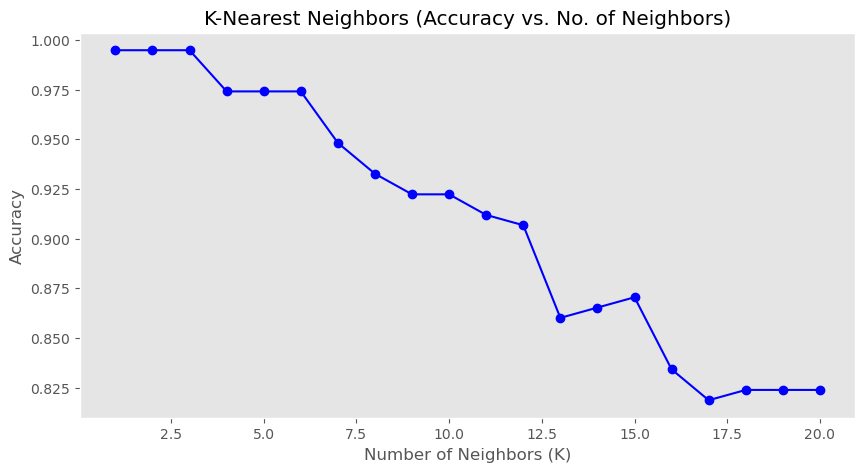

In [57]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Resume'])  # Feature extraction
y = df['Category']  # Labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store accuracy values
neighbors = list(range(1, 21))  # Checking K values from 1 to 20
accuracy_scores = []

# Train and evaluate KNN for different values of K
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot Accuracy vs. No. of Neighbors
plt.figure(figsize=(10, 5))
plt.plot(neighbors, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors (Accuracy vs. No. of Neighbors)')
plt.grid()
plt.show()

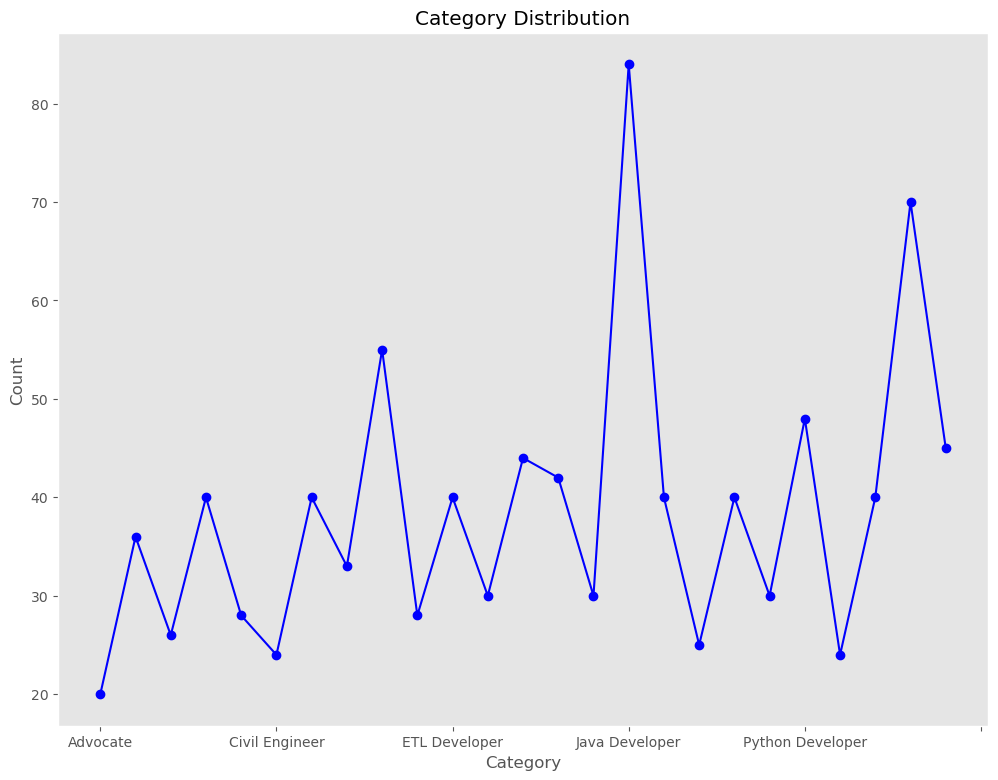

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))  # Adjust size to match your reference
df['Category'].value_counts().sort_index().plot(kind="line", marker='o', linestyle='-', color='b')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution")
plt.grid()
plt.show()


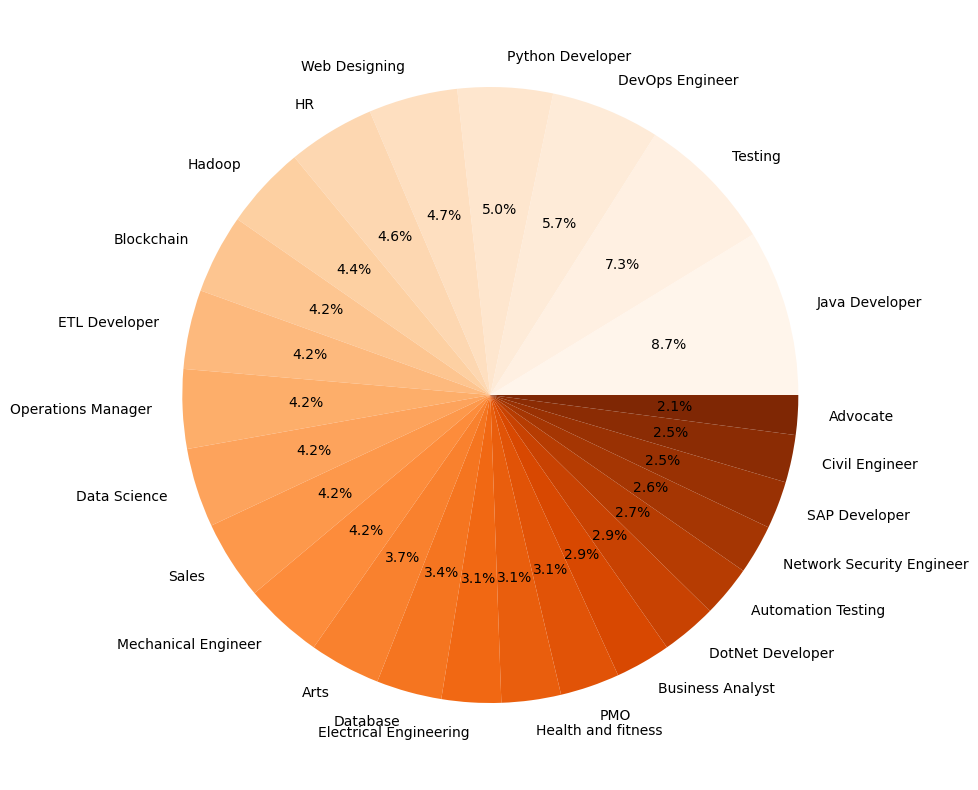

In [694]:
counts = df['Category'].value_counts()
labels = counts.index  # Fixing the label issue

plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.Oranges(np.linspace(0,1,len(labels))))
plt.show()

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt


In [17]:
import matplotlib
matplotlib.use('TkAgg')  # For local scripts


In [19]:
plt.show(block=True)


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def plot_knn_accuracy(X_train, X_test, y_train, y_test):
    k_values = range(1, 21)
    accuracies = []

    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    plt.figure(figsize=(8,5))
    plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('KNN Accuracy vs Number of Neighbors')
    plt.grid()
    plt.show()


In [697]:
# Remove URL
# Remove Emails
# Remove Special Character
# Remove stop words

In [698]:
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('', clean_text)
    
    clean_text = re.sub('[^\w\s]', '', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text  = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text
    

<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Asmita\AppData\Local\Temp\ipykernel_9212\877866067.py:7: SyntaxWarning: invalid escape sequence '\w'
  clean_text = re.sub('[^\w\s]', '', clean_text)


In [703]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

def clean(text):
    # Remove URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub('', text)
    
    # Remove Emails
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    text = email_pattern.sub('', text)
    
    # Remove Special Characters
    text = re.sub(r'[^\w\s]', '', text, flags=re.UNICODE)
    
    # Convert to lowercase
    text = text.lower()

    # Remove Stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    text = ' '.join(word for word in words if word not in stop_words)
    
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asmita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Asmita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [705]:
s = 'Hello, $%& I found this # article at https://www.chando.com ! You can contact me at chando@example.com'

In [707]:
import nltk
nltk.download('punkt_tab')  

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asmita/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [709]:
clean(s)

'hello found article contact'

In [711]:
df['Resume'] = df['Resume'].apply(lambda x:clean(x))

In [712]:
df['Resume'][0]

'skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm naãve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists accelerating review process run ana

In [713]:
# Encoding

In [717]:
le = LabelEncoder()
le.fit(df[['Category']])
df['Category'] = le.transform(df['Category'])

C:\Users\Asmita\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [719]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])


In [721]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23], dtype=int64)

In [723]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Resume'])
resume = tfidf.transform(df['Resume'])

In [724]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(resume, df['Category'], test_size=0.2, random_state=42)


In [727]:
X_train.shape

(769, 8017)

In [729]:
y_train.shape

(769,)

In [731]:
X_test.shape

(193, 8017)

In [733]:
y_test.shape

(193,)

In [735]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the KNN model
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)  # Train the model

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")  # Use 'macro' or 'micro' as needed
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1 Score: 0.98


In [737]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [739]:
models = {
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB(),
    'OneVsRestClassifier': OneVsRestClassifier(KNeighborsClassifier()) 
}

In [741]:
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy  = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"Accuarcy of {model_name} on test data: {accuracy}")

Accuarcy of KNeighborsClassifier on test data: 0.9844559585492227
Accuarcy of LogisticRegression on test data: 0.9948186528497409
Accuarcy of RandomForestClassifier on test data: 0.9844559585492227
Accuarcy of SVC on test data: 0.9948186528497409
Accuarcy of MultinomialNB on test data: 0.9792746113989638
Accuarcy of OneVsRestClassifier on test data: 0.9844559585492227


In [742]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [743]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")


Accuracy of the Logistic Regression model: 0.9948186528497409


In [744]:
myresume = """Education Details 
May 2011 to May 2014 Bachelor of science Information technology Mumbai, Maharashtra Mumbai university
Oracle DBA 

Oracle database administrator
Skill Details 
Installation of Oracle on RH Linux & Windows. Creating/Managing user profiles and analyzing their privileges and tablespace quotas Backup of database Logical and Physical procedures. Recovery of database in case of database crash, disk/media failure, etc. Standard DBA functions like space management, Rollback segments, Extents. Database Management and Monitoring the database. Willing to learn new things. Being a constructive team member, contributing practically to the success of the team.- Exprience - 48 monthsCompany Details 
company - Accelya kale solutions ltd
description - Database Administrator working in 24*7 support environment maintaining Databases running on Oracle 11g, 12c.
Database Up-gradation from Oracle 11g to Oracle 12c.
Installation of Database critical patches.
Taking cold and hot backups on scheduled times and monitoring backups.
Importing the export dump to another database as per demands.
Automating most of the daily activities through cronjobs, shell scripts or schedulers.
Making Plan of Actions for Various Activities.
Raising SR with Oracle Support for different severity issues.
Handling the Userâs request and proper client interaction.
Monitoring & managing database growth, tablespaces, adding ,resizing and renaming the datafiles.
Restoration of database using RMAN backups for backup consistency checks.
Migration of Database using export / import and RMAN backups.
Configuring & managing Physical Standby database.
Creating database links, Tablespaces, database directories.
Managing network settings through listener.ora and tnsnames.ora files.
Restoration of data using old logical backup as per client request.
Schema replication across databases through data pump tool.
Taking cold and hot backups on scheduled times and monitoring backups
Taking EXPDP of database, database objects and a particular schema
Using SCP ticketing tool in order keeping track of client requests.Â 
Performing Maintenance Activities such as Index Rebuilding and stats gather.
Troubleshooting the Basic LevelÂ performance issuesÂ 
Setting up a new environmentÂ from database perspective within the requested timelines
Adding/Deleting disks in ASM and monitoring the ASM diskgroups.
Creating users & privileges with appropriate roles and levels of security.Â 
Database Administrator working in 24*7 support environment maintaining Databases running on Oracle 11g, 12c.
Performing database online and offline database re-organization for database enhancement.Â 
Migrating database from Non-ASM to ASM file system.
Grid up-gradation from 11g to 12C.
company - Insolutions Global Ltd
description - Oracle software installation(graphical/silent),Database upgrade,Patch upgrade.
Maintaining around 80+ UAT DB servers, 40 production DB and 28 standby/DR DB.
Managing/creating DR & standby servers, DB sync.
Backup and recovery (RMAN/ Datapump).
Performing activities like switchover and failover .
Allocating system storage and planning future storage requirements for the database system
Enrolling users and maintaining system security.
Monitoring Alert log, Snap ID generation, db size, Server space, OEM reports, User validity.
Controlling and monitoring user access to the database .
Scheduling shell scripts or dbms_jobs using Crontab or DBMS_SCHEDULER (monitoring script, listener check, backup script, AWR reports) etc.
Planning for backup and recovery of database.
Managing the production database for Oracle and SQL Server and resize the space of database/Datafiles/Tablespace/Transactional Logs.
Managing Temp and Undo tablespaces.
Creating primary database storage structures (tablespaces) after application developers have designed an application."""

In [745]:
df.head()

,Category,Resume
0,6,skills programming languages python pandas num...
1,6,education details may 2013 may 2017 uitrgpv da...
2,6,areas interest deep learning control system de...
3,6,skills â r â python â sap hana â tableau â sap...
4,6,education details mca ymcaust faridabad haryan...


In [746]:
cleaned_resume = clean(myresume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = model.predict(input_features)[0]
category_map = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_map.get(prediction_id, "Unknown")
print("Predicted Category is-> ", category_name)

Predicted Category is->  Database


In [747]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))